## Importing Necessary Libraries

In [76]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Import the dataset

In [53]:
df = pd.read_excel('../data/dataset_v1.xlsx', index_col="Loan_ID")
full_df_engineered = pd.read_excel("../data/dataset_v3.xlsx", index_col="Loan_ID")
full_df_engineered.head()

,TotalIncome,LoanAmtToTotalIncomeRatio,DependentsRatio,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Self_Employed,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,,,,
LP001002,-0.182240,0.114833,-0.825068,0.073496,-0.555746,-3.376631e-16,0.275516,1,0,0,True,False,False,False,True,False,False,False,True,1,1
LP001003,-0.144818,-0.334007,0.784671,-0.133510,-0.040955,-2.182381e-01,0.275516,1,1,0,False,True,False,False,True,False,True,False,False,1,0
LP001005,-0.622808,-0.223715,-0.825068,-0.392350,-0.555746,-9.548270e-01,0.275516,1,1,1,True,False,False,False,True,False,False,False,True,1,1
LP001006,-0.322653,0.032217,-0.825068,-0.460534,0.249212,-3.132818e-01,0.275516,1,1,0,True,False,False,False,False,True,False,False,True,1,1
LP001008,-0.158890,-0.055823,-0.825068,0.098187,-0.555746,-6.379206e-02,0.275516,1,0,0,True,False,False,False,True,False,False,False,True,1,1


## Splitting The Data Into Train and Test Sets

In [54]:
x = full_df_engineered.drop('Loan_Status', axis = 1)
y = full_df_engineered['Loan_Status'].copy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((488, 20), (123, 20), (488,), (123,))

<Axes: xlabel='Loan_Status', ylabel='count'>

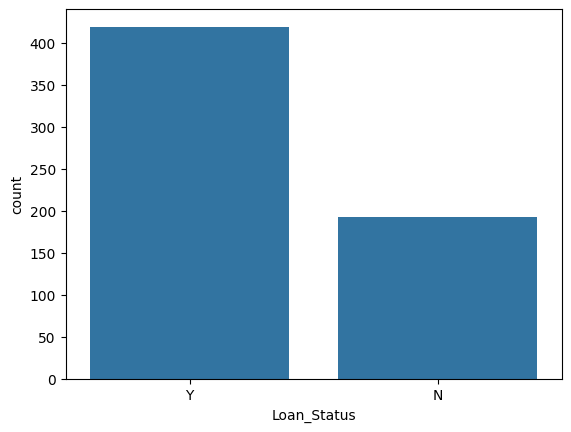

In [55]:
sns.barplot(df.Loan_Status.value_counts())

## Choosing The Best Models

## Steps 
* Choosing Classification Models
* Cross Validation

### Types of Classification Models

#### Importing Classification Models

In [56]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#### Instatiate the models

In [57]:
xgb_classifier = XGBClassifier(random_state=42)
tree_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100 , class_weight='balanced')
gb_classifier = GradientBoostingClassifier(random_state=42, n_estimators=1000)
log_classifier = LogisticRegression(random_state=42)
svc_classifier = SVC(C=2.0, random_state=42)
knn_classifier = KNeighborsClassifier()

In [58]:
columns=['XGBClassifier' , 'DecisionTreeClassifier' , 'RandomForestClassifier' , 'GradientBoostingClassifier', 'LogisticRegression', 'SUpport Vector Classifier', 'KNeighborsClassifier']
result1=[]
result2=[]
result3=[]

In [59]:
def cal(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(pred,y_test)
    recall = recall_score(pred,y_test)
    f1 = f1_score(pred,y_test)
    
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    
    sns.heatmap(confusion_matrix(pred,y_test) , annot=True)
    print(model)
    print('accuracy is : ' , accuracy)
    print('recall is : ' , recall)
    print('f1 is : ' , f1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
accuracy is :  0.7235772357723578
recall is :  0.8
f1 is :  0.8089887640449438


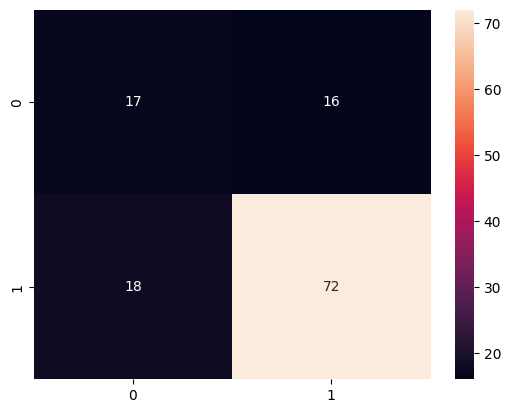

In [60]:
cal(xgb_classifier)

DecisionTreeClassifier(random_state=42)
accuracy is :  0.6910569105691057
recall is :  0.7906976744186046
f1 is :  0.7816091954022989


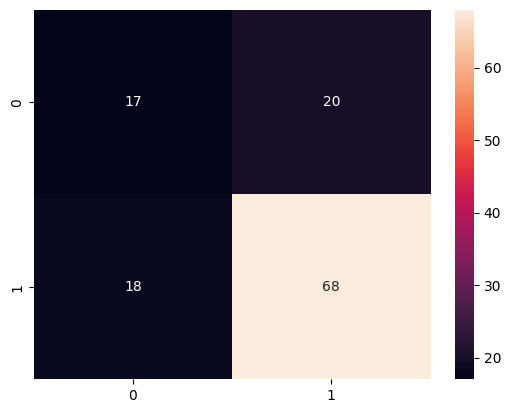

In [61]:
cal(tree_classifier)

RandomForestClassifier(class_weight='balanced', random_state=42)
accuracy is :  0.7804878048780488
recall is :  0.8426966292134831
f1 is :  0.847457627118644


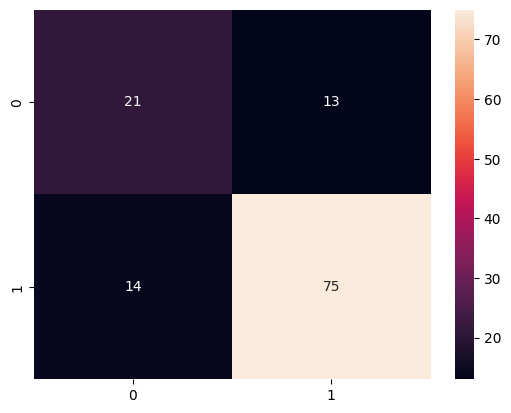

In [62]:
cal(rf_classifier)

GradientBoostingClassifier(n_estimators=1000, random_state=42)
accuracy is :  0.7804878048780488
recall is :  0.8588235294117647
f1 is :  0.8439306358381503


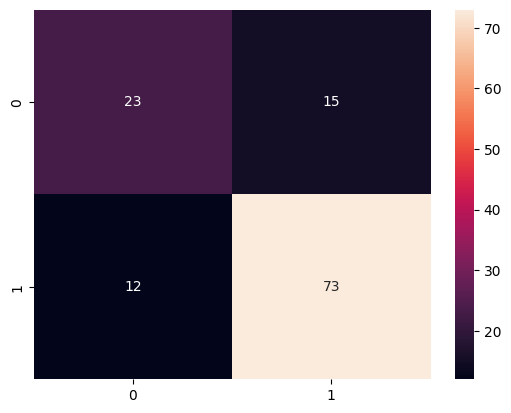

In [63]:
cal(gb_classifier)

LogisticRegression(random_state=42)
accuracy is :  0.7642276422764228
recall is :  0.8172043010752689
f1 is :  0.8397790055248618


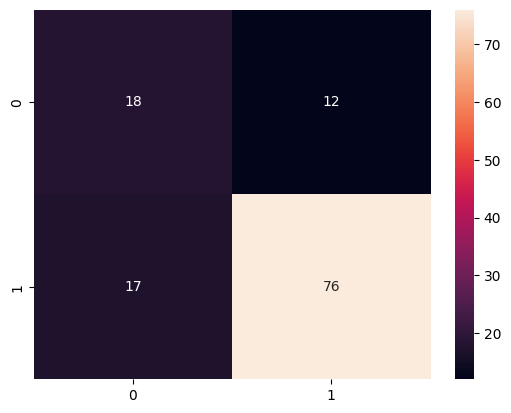

In [64]:
cal(log_classifier)

SVC(C=2.0, random_state=42)
accuracy is :  0.8048780487804879
recall is :  0.8404255319148937
f1 is :  0.8681318681318682


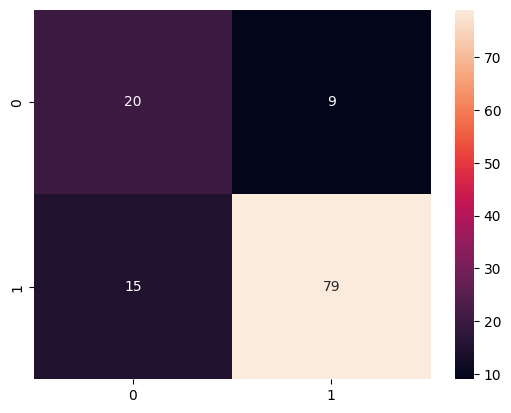

In [65]:
cal(svc_classifier)

KNeighborsClassifier()
accuracy is :  0.7073170731707317
recall is :  0.7549019607843137
f1 is :  0.8105263157894737


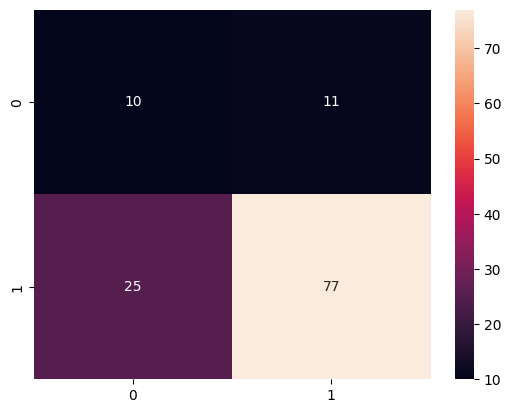

In [66]:
cal(knn_classifier)

In [67]:
result1

[0.7235772357723578,
 0.6910569105691057,
 0.7804878048780488,
 0.7804878048780488,
 0.7642276422764228,
 0.8048780487804879,
 0.7073170731707317]

In [68]:
result2

[0.8,
 0.7906976744186046,
 0.8426966292134831,
 0.8588235294117647,
 0.8172043010752689,
 0.8404255319148937,
 0.7549019607843137]

In [69]:
result3

[0.8089887640449438,
 0.7816091954022989,
 0.847457627118644,
 0.8439306358381503,
 0.8397790055248618,
 0.8681318681318682,
 0.8105263157894737]

In [70]:
len(columns), len(result1), len(result2), len(result3)

(7, 7, 7, 7)

In [71]:
finlresult = pd.DataFrame({'Algorithm' : columns , 'Accuracy' : result1 , 'Recall' : result2 , 'FScore' : result3})

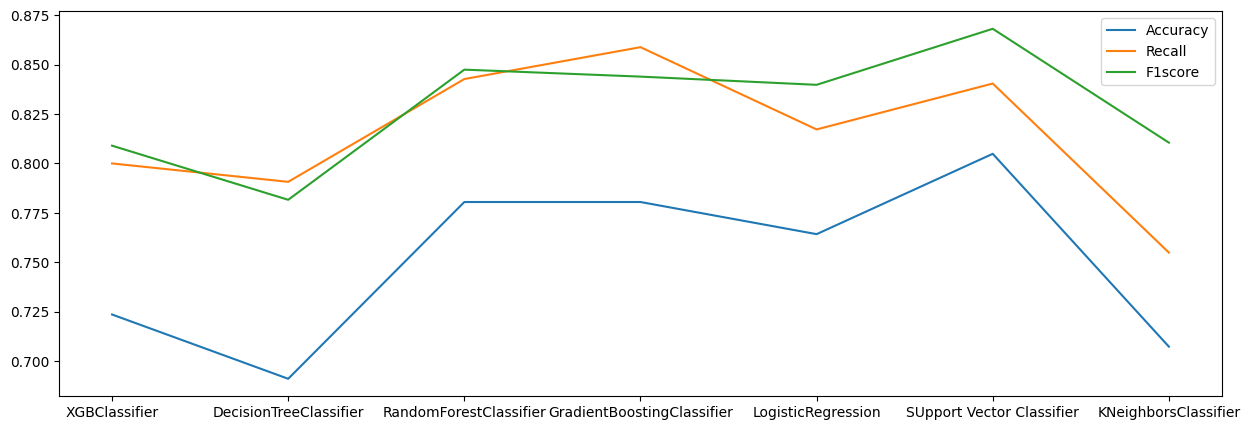

In [74]:
plt.figure(figsize=(15, 5))
plt.plot(finlresult.Algorithm, result1, label = 'Accuracy')
plt.plot(finlresult.Algorithm, result2, label = 'Recall')
plt.plot(finlresult.Algorithm, result3, label = 'F1score')
plt.legend()
plt.show()

<Axes: xlabel='Algorithm'>

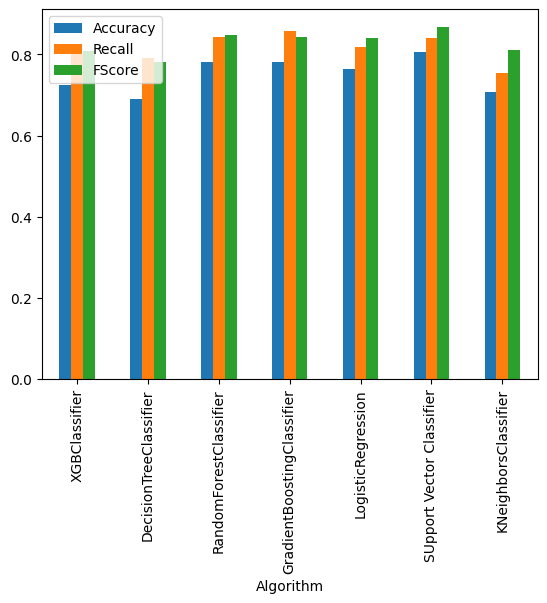

In [75]:
finlresult.plot(kind = "bar", x="Algorithm")

In [77]:
filename = "models_and_encoders/best_loan_model(SVC).pkl"
pkl = pickle.dump(svc_classifier, open(filename, 'wb'))